In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/Users/anishdulla/Desktop/rideshare_kaggle.csv')

In [3]:
df1 = df[['id', 'hour', 'day', 'month', 'datetime', 'source', 'destination', 'cab_type', 'name', 'price', 'surge_multiplier', 'visibility', 'apparentTemperature', 'distance', 'short_summary']].copy()

In [4]:
df1

id  hour  day  month  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7     9   16     12   
1       4bd23055-6827-41c6-b23b-3c491f24e74d     2   27     11   
2       981a3613-77af-4620-a42a-0c0866077d1e     1   28     11   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512     4   30     11   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a     3   29     11   
...                                      ...   ...  ...    ...   
693066  616d3611-1820-450a-9845-a9ff304a4842    23    1     12   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341    23    1     12   
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda    23    1     12   

                   datetime            source    destination cab_type  \
0       2018-12-16 09:30:07  Haymarket Square  North Station     Lyft   
1       2018-11-27 02:00:23  Haymarket Square  North Station     Lyft   
2       2018-11-28 01:00:22  Haymarket Square  North Station     Lyft   
3       2018-11-30 04:53:02  Haymarket Square  North Station     Lyft   
4       2018-11-29 03:49:20  Haymarket Square  North Station     Lyft   
...                     ...               ...            ...      ...   
693066  2018-12-01 23:53:05          West End      North End     Uber   
693067  2018-12-01 23:53:05          West End      North End     Uber   
693068  2018-12-01 23:53:05          West End      North End     Uber   
693069  2018-12-01 23:53:05          West End      North End     Uber   
693070  2018-12-01 23:53:05          West End      North End     Uber   

                name  price  surge_multiplier  visibility  \
0             Shared    5.0               1.0      10.000   
1                Lux   11.0               1.0       4.786   
2               Lyft    7.0               1.0      10.000   
3       Lux Black XL   26.0               1.0      10.000   
4            Lyft XL    9.0               1.0      10.000   
...              ...    ...               ...         ...   
693066        UberXL   13.0               1.0       9.785   
693067         UberX    9.5               1.0       9.785   
693068          Taxi    NaN               1.0       9.785   
693069     Black SUV   27.0               1.0       9.785   
693070      UberPool   10.0               1.0       9.785   

        apparentTemperature  distance    short_summary  
0                     37.12      0.44   Mostly Cloudy   
1                     37.35      0.44            Rain   
2                     32.93      0.44           Clear   
3                     29.63      0.44           Clear   
4                     30.88      0.44   Partly Cloudy   
...                     ...       ...              ...  
693066                37.05      1.00   Partly Cloudy   
693067                37.05      1.00   Partly Cloudy   
693068                37.05      1.00   Partly Cloudy   
693069                37.05      1.00   Partly Cloudy   
693070                37.05      1.00   Partly Cloudy   

[693071 rows x 15 columns]

In [5]:
df1.dtypes

id                      object
hour                     int64
day                      int64
month                    int64
datetime                object
source                  object
destination             object
cab_type                object
name                    object
price                  float64
surge_multiplier       float64
visibility             float64
apparentTemperature    float64
distance               float64
short_summary           object
dtype: object

In [6]:
df1 = df1.rename(columns={"price": "Price", "name": "Product", "short_summary": "Weather", "hour": "Hour", "cab_type": 'Brand'})

In [7]:
df1.loc[df1['Product'] == 'Taxi', 'Product'] = 'UberTaxi'
df1.loc[df1['Product'] == 'Shared', 'Product'] = 'Lyft Shared'
df1.loc[df1['Product'] == 'Lux', 'Product'] = 'Lyft Lux'
df1.loc[df1['Product'] == 'Lyft', 'Product'] = 'Lyft Regular'
df1.loc[df1['Product'] == 'Black SUV', 'Product'] = 'Uber Black SUV'
df1.loc[df1['Product'] == 'WAV', 'Product'] = 'Uber WAV'
df1.loc[df1['Product'] == 'Black', 'Product'] = 'Uber Black'

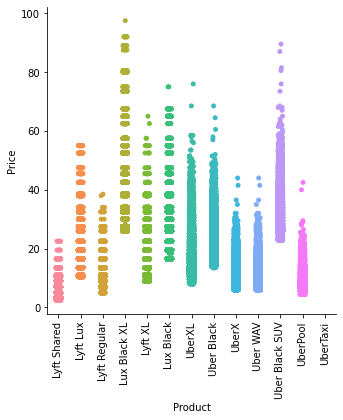

In [9]:
ax = sns.catplot(x='Product', y = 'Price', data=df1)
ax.set_xticklabels(rotation=90)
plt.show()

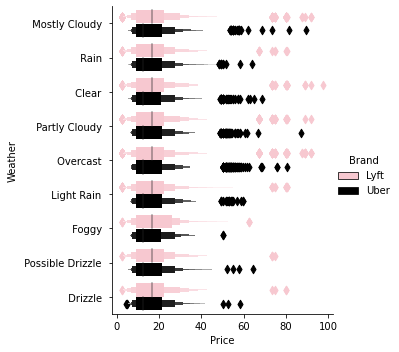

In [10]:
custom_palette = ['pink', 'black']
sns.set_palette(custom_palette)
sns.catplot(x="Price", y="Weather", hue="Brand", kind="boxen", data=df1)

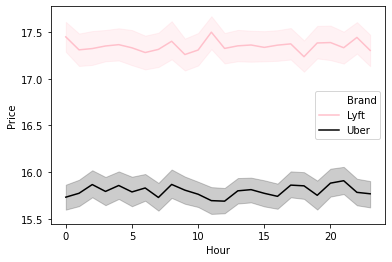

In [11]:
sns.set_palette(custom_palette)
sns.lineplot(df1['Hour'], df1['Price'], hue=df1['Brand'])